In [11]:
import statsmodels.api as sm
# from statsmodels.stats.multitest import multipletests as mpt
# import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import itertools
import seaborn as sns
# %pylab inline

import numpy as np
cells2 = pd.read_csv('cleaned_cell_10_normalized_cosine_key5.csv')

In [12]:
#you will need to set the following with your own data
patient_col = 'Donor'
neighborhood_col = 'neighborhood5'
nbs = [0,1,2,3,4]
patients = ['ABI2259', 'ACHM315', 'AFES372', 'AFFN281', 'AFG1440', 'AGBA390',
       'ABHQ115', 'ABIC495', 'ABIQ254', 'ACIA085', 'ADBI307', 'ADIX484',
       'ADLE098', 'AEDN413', 'AEJR177', 'AFCM451']
group = pd.Series([0] * 6+ [1] * 10) 
cells = ['α cell', 'δ cell', 'β cell', 'γ cell', 'ɛ cell', 'T cell', 'Macrophage', 'Other immune cell', 'EC', 'Pericyte']

In [13]:
'''
preparing dataframes (best to do this on your data):
ct_freq should be a df of cell type frequencies per patient

all_freqs should have cols patient, neighborhood, cell types, giving
the frequency of cells of that type in that neighborhood in that patient
'''
ct_freq = cells2.groupby(patient_col).apply(lambda x: x['Cell Name'].value_counts()).unstack().reset_index()
all_freqs = cells2.groupby([patient_col, neighborhood_col]).apply(lambda x: x['Cell Name'].value_counts()).unstack().reset_index()

In [14]:
ct_freq.to_csv(f'cell_type_freqs_per_patient_nb10_cn5_normalized_cosine_key5.csv', index=False, encoding='utf-8-sig')
all_freqs.to_csv(f'allcell_type_counts_perneighborhood_perpatient_nb10_cn5_normalized_cosine_key5.csv', index=False, encoding='utf-8-sig')

In [15]:
def normalize(X):
    arr = np.array(X.fillna(0).values)
    return pd.DataFrame(np.log2(1e-3 + arr/arr.sum(axis =1, keepdims = True)), index = X.index.values, columns = X.columns).fillna(0)

In [16]:
# data prep
# normalized overall cell type frequencies
X_cts = normalize(ct_freq.set_index(patient_col).loc[patients,cells])

# normalized neighborhood specific cell type frequencies
df_list = []

for nb in nbs:
    cond_nb = all_freqs.loc[all_freqs[neighborhood_col]==nb,[patient_col] + cells].rename({col: col+'_'+str(nb) for col in cells},axis = 1).set_index(patient_col)
    df_list.append(normalize(cond_nb))

X_cond_nb = pd.concat(df_list,axis = 1).loc[patients]

In [17]:
X_cond_nb

,α cell_0,δ cell_0,β cell_0,γ cell_0,ɛ cell_0,T cell_0,Macrophage_0,Other immune cell_0,EC_0,Pericyte_0,...,α cell_4,δ cell_4,β cell_4,γ cell_4,ɛ cell_4,T cell_4,Macrophage_4,Other immune cell_4,EC_4,Pericyte_4
ABI2259,-0.487015,-5.662004,-2.727380,-9.965784,-9.965784,-6.452715,-5.265345,-8.341293,-3.885411,-6.003852,...,-1.724577,-1.941979,-1.856569,-9.965784,-9.965784,-7.312494,-4.362335,-9.965784,-3.458829,-5.495637
ACHM315,-0.494244,-6.695923,-2.295555,-7.428967,-8.419209,-8.419209,-5.321041,-9.965784,-4.774271,-6.318772,...,-1.866573,-1.866573,-1.616452,-5.634818,-9.965784,-8.065742,-5.141912,-6.764665,-4.032464,-6.389388
AFES372,-0.633479,-6.419796,-2.266331,-4.895284,-9.965784,-7.121148,-5.852976,-6.728266,-3.954136,-6.287218,...,-1.920886,-1.941467,-1.682817,-4.750121,-9.965784,-7.720700,-5.860653,-8.797859,-3.441870,-5.665423
AFFN281,-0.546075,-6.824233,-2.332249,-7.360273,-9.489417,-8.402049,-5.178975,-7.669367,-4.057051,-6.088701,...,-1.879990,-1.800616,-1.535450,-6.579489,-9.965784,-8.215578,-5.210644,-8.215578,-4.270141,-6.752557
AFG1440,-0.503242,-7.232491,-2.302618,-9.319648,-9.965784,-8.030378,-5.405138,-7.501175,-4.148999,-8.260962,...,-1.603292,-1.950021,-1.472429,-9.965784,-9.965784,-9.965784,-5.910502,-6.826233,-5.354759,-6.826233
AGBA390,-0.454807,-6.652542,-2.465328,-7.354953,-9.965784,-7.693338,-6.182182,-7.081050,-4.228024,-8.421938,...,-1.609699,-1.732165,-1.901491,-6.124482,-7.850307,-7.027185,-6.506353,-6.124482,-4.035047,-9.965784
ABHQ115,-0.556928,-5.981467,-2.355507,-5.281431,-9.965784,-6.521557,-5.376965,-5.479276,-5.027779,-7.863162,...,-2.175991,-1.901491,-1.267105,-6.688446,-9.965784,-8.002846,-5.206258,-5.369541,-5.059591,-6.688446
ABIC495,-0.409397,-9.965784,-2.418531,-9.965784,-9.965784,-9.965784,-4.395576,-9.965784,-5.921051,-9.965784,...,-2.295022,-1.802314,-1.114568,-9.965784,-7.478222,-7.478222,-5.378331,-9.965784,-5.685334,-9.965784
ABIQ254,-0.408282,-6.191479,-2.239691,-8.983486,-9.965784,-6.938193,-6.938193,-7.332760,-7.771308,-9.965784,...,-1.964302,-1.713368,-1.351849,-6.014039,-9.965784,-7.318894,-5.502905,-7.659123,-7.318894,-9.965784
ACIA085,-0.604009,-6.979723,-2.172869,-6.317496,-8.621830,-8.621830,-5.085023,-8.239959,-3.913007,-7.476399,...,-1.932147,-1.776409,-1.518486,-6.031672,-8.118829,-9.965784,-6.159768,-9.965784,-3.867069,-8.118829


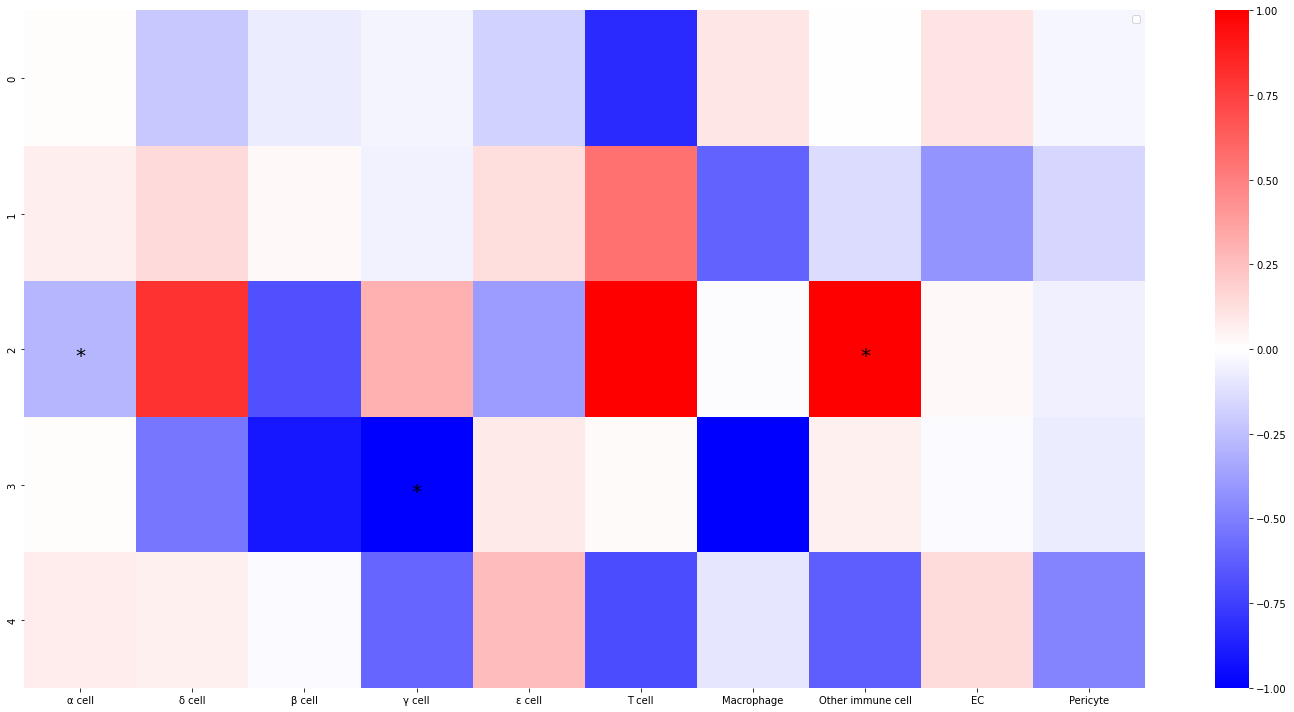

In [18]:
#differential enrichment for all cell subsets
changes = {}
for col in cells:
    for nb in nbs:
        #build a design matrix with a constant, group 0 or 1 and the overall frequencies
        X = pd.concat([X_cts.reset_index()[col], group.astype('int'),pd.Series(np.ones(len(group)), index = group.index.values)],axis = 1).values
        if col+'_%d'%nb in X_cond_nb.columns:
            #set the neighborhood specific ct freqs as the outcome
            Y = X_cond_nb[col+'_%d'%nb].values
            X = X[~pd.isna(Y)]
            Y = Y[~pd.isna(Y)]
            #fit a linear regression model
            results = sm.OLS(Y,X).fit()
            #find the params and pvalues for the group coefficient
            changes[(col,nb)] = (results.pvalues[1], results.params[1])

#make a dataframe with coeffs and pvalues
dat = (pd.DataFrame(changes).loc[1].unstack())
dat = pd.DataFrame(np.nan_to_num(dat.values),index = dat.index, columns = dat.columns).T.sort_index(ascending=True).loc[:,X_cts.columns]
pvals = (pd.DataFrame(changes).loc[0].unstack()).T.sort_index(ascending=True).loc[:,X_cts.columns]

#this is where you should correct pvalues for multiple testing 


#plot as heatmap
f, ax = plt.subplots(figsize = (20,10))
g = sns.heatmap(dat,cmap = 'bwr', vmin = -1, vmax = 1,cbar=True,ax = ax)
for a,b in zip(*np.where (pvals<0.1)): #0.05
    plt.text(b+.5,a+.55,f'*',fontsize = 20,ha = 'center',va = 'center')
plt.tight_layout()
plt.legend([1,2,3])